In [ ]:
# IMPORTED the pandaslibrary for datamanipulation and analysis, allowing us to load and processdatasets efficiently.
import pandas as PNas

# IMPORTED the LabelEncoder from sklearn.preprocessing to convert categoricallabels into numericalvalues for modelprocessing.
from sklearn.preprocessing import LabelEncoder

# IMPORTED the Matplotliblibrary to create static, animated, and interactivevisualizations for exploratory dataanalysis.
import matplotlib.pyplot as MTptLB

# IMPORTED the PlotlyExpressLibrary for creating interactive and dynamicvisualizations to analyzetrends in dataeffectively.
import plotly.express as PoXe

# IMPORTED the NumPylibrary to perform numerical computations efficiently, including handling arrays and mathematicaloperations.
import numpy as NMpy

# IMPORTED TensorFlow, an opensource machinelearning framework, for building and training deeplearningmodels.
import tensorflow as TanFlow

# IMPORTED Keras, a deeplearning-API within TensorFlow, to construct and trainneuralnetworkmodels easily.
from tensorflow import keras

# IMPORTED the Sequentialclass from Keras to define a neuralnetwork model as a linear stack of layers.
from tensorflow.keras.models import Sequential

# IMPORTED the Denselayer from Keras, which is a fully connectedlayer where each neuron is connected to everyneuron in the previouslayer.
from tensorflow.keras.layers import Dense, Dropout

# IMPORTED the to_categorical-function from Kerasutilities to convert integerlabels into onehot encodedvectors for classificationtasks.
from tensorflow.keras.utils import to_categorical

# IMPORTED StandardScaler from sklearn.preprocessing to standardizenumerical features by scaling them to a mean of zero and a standarddeviation of one.
from sklearn.preprocessing import StandardScaler

# IMPORTED accuracy_score from sklearn.metrics to evaluate the classification model’s accuracy by comparing predicted and actual labels.
from sklearn.metrics import accuracy_score

# IMPORTED train_test_split from sklearn.model_selection to split the dataset into training and testing subsets for model evaluation.
from sklearn.model_selection import train_test_split

# IMPORTED the Adam optimizer from Keras, a widely used optimization algorithm for deep learning models that adapts learning rates based on gradient updates.
from tensorflow.keras.optimizers import Adam

# IMPORTED precision_score from sklearn.metrics to measure the proportion of correctly predicted positive instances out of all predicted positives.
from sklearn.metrics import precision_score

# IMPORTED recall_score from sklearn.metrics to compute the ratio of correctly predicted positive instances to the total actual positive instances.
from sklearn.metrics import recall_score

# IMPORTED f1score from sklearnmetrics to calculate the harmonic mean of precisionscore and recallscore, providing a balancedevaluation metric for imbalanced datasets.
from sklearn.metrics import f1_score

# IMPORTED classificationreport from sklearnmetrics to generate a detailed summary of precision, recall, and F1-score for each class in the classification model.
from sklearn.metrics import classification_report

# IMPORTED the Seabornlibrary to createinformative and visuallyappealing statisticalgraphics for datavisualization.
import seaborn as SBrn

# IMPORTED confusionmatrix from sklearn.metrics to generate a matrixrepresentation of actualversus predictedclassifications for performanceanalysis.
from sklearn.metrics import confusion_matrix

In [ ]:
Predict_Movie_Success_DataSet = PNas.read_csv("/content/movie_metadata.csv")

In [ ]:
Predict_Movie_Success_DataSet.shape

(5043, 28)

In [ ]:
Predict_Movie_Success_DataSet.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
Predict_Movie_Success_DataSet.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
Predict_Movie_Success_DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
Predict_Movie_Success_DataSet.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
Predict_Movie_Success_DataSet.isnull().sum()

,0
color,19
director_name,104
num_critic_for_reviews,50
duration,15
director_facebook_likes,104
actor_3_facebook_likes,23
actor_2_name,13
actor_1_facebook_likes,7
gross,884
genres,0


In [ ]:
Predict_Movie_Success_DataSet = Predict_Movie_Success_DataSet.drop(['movie_title', 'movie_imdb_link'], axis=1)

In [ ]:
# Defining a function named 'fill_missing_values' that takes a DataFrame as input and fills missing values in numerical and categorical columns.
def fill_missing_values(df):

    # Creating a list of column names that contain numerical data, which will be filled using the median value of each respective column.
    numeric_columns = ['gross', 'duration', 'num_critic_for_reviews', 'director_facebook_likes', 'actor_3_facebook_likes',
                       'actor_1_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget',
                       'title_year', 'actor_2_facebook_likes', 'aspect_ratio']

    # Creating a list of column names that contain categorical data, which will be filled using the most frequently occurring value (mode) of each respective column.
    categorical_columns = ['color', 'director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name',
                           'plot_keywords', 'language', 'country', 'content_rating']

    # Iterating through each column in the list of numeric columns to replace missing values with the column's median.
    for col in numeric_columns:
        df[col] = df[col].fillna(df[col].median())  # Filling NaN values with the median to minimize the effect of outliers.

    # Iterating through each column in the list of categorical columns to replace missing values with the most frequent value (mode).
    for col in categorical_columns:
        df[col] = df[col].fillna(df[col].mode()[0])  # Filling NaN values with mode, ensuring categorical consistency.

    # Returning the modified DataFrame with all missing values handled appropriately.
    return df

# Calling the 'fill_missing_values' function on the 'Predict_Movie_Success_DataSet' DataFrame to clean missing values before further analysis.
Predict_Movie_Success_DataSet = fill_missing_values(Predict_Movie_Success_DataSet)

In [ ]:
Predict_Movie_Success_DataSet.isnull().sum()

,0
color,0
director_name,0
num_critic_for_reviews,0
duration,0
director_facebook_likes,0
actor_3_facebook_likes,0
actor_2_name,0
actor_1_facebook_likes,0
gross,0
genres,0


In [ ]:
# Defining a function named 'bin_imdb' that takes an IMDb score as input and categorizes the movie into three groups: 'HIT', 'AVG', and 'FLOP'.
def bin_imdb(score):

    # Checking if the IMDb score is 7.5 or higher; if so, classify the movie as a 'HIT' (indicating strong performance).
    if score >= 7.5:
        return 'HIT'

    # Checking if the IMDb score falls between 5.5 (inclusive) and 7.5 (exclusive); if so, classify it as 'AVG' (average performance).
    elif 5.5 <= score < 7.5:
        return 'AVG'

    # If the score is below 5.5, classify the movie as a 'FLOP' (indicating poor performance).
    else:
        return 'FLOP'

# Applying the 'bin_imdb' function to the 'imdb_score' column of the 'Predict_Movie_Success_DataSet' DataFrame
# and creating a new column named 'imdb_binned' to store the categorized values.
Predict_Movie_Success_DataSet['imdb_binned'] = Predict_Movie_Success_DataSet['imdb_score'].apply(bin_imdb)

# Displaying the first few rows of the DataFrame after adding the new 'imdb_binned' column to check the categorization.
Predict_Movie_Success_DataSet.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_binned
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,HIT
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,AVG
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,AVG
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,HIT
4,Color,Doug Walker,110.0,103.0,131.0,371.5,Rob Walker,131.0,25517500.0,Documentary,...,English,USA,R,20000000.0,2005.0,12.0,7.1,2.35,0,AVG


In [ ]:
Predict_Movie_Success_DataSet['imdb_binned'].value_counts()

,count
imdb_binned,
AVG,3297
HIT,887
FLOP,859


In [ ]:
Predict_Movie_Success_DataSet.duplicated().sum()

45

In [ ]:
Predict_Movie_Success_DataSet.shape

(5043, 27)

In [ ]:
# Initializing a LabelEncoder instance, which will be used to convert categorical text labels into numerical values.
le = LabelEncoder()

# Selecting all columns in the 'Predict_Movie_Success_DataSet' DataFrame that have an object (categorical) data type.
object_cols = Predict_Movie_Success_DataSet.select_dtypes(include=['object']).columns

# Iterating through each column in the list of categorical columns to encode them into numerical values.
for col in object_cols:
    # Applying label encoding to each categorical column, transforming unique text labels into integer values.
    Predict_Movie_Success_DataSet[col] = le.fit_transform(Predict_Movie_Success_DataSet[col])

# Displaying the first few rows of the DataFrame after encoding categorical columns to verify the transformation.
Predict_Movie_Success_DataSet.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_binned
0,1,922,723.0,178.0,0.0,855.0,1405,1000.0,760505847.0,106,...,11,62,7,237000000.0,2009.0,936.0,7.9,1.78,33000,2
1,1,794,302.0,169.0,563.0,1000.0,2216,40000.0,309404152.0,100,...,11,62,7,300000000.0,2007.0,5000.0,7.1,2.35,0,0
2,1,2021,602.0,148.0,0.0,161.0,2487,11000.0,200074175.0,127,...,11,61,7,245000000.0,2015.0,393.0,6.8,2.35,85000,0
3,1,373,813.0,164.0,22000.0,23000.0,532,27000.0,448130642.0,287,...,11,62,7,250000000.0,2012.0,23000.0,8.5,2.35,164000,2
4,1,600,110.0,103.0,131.0,371.5,2431,131.0,25517500.0,753,...,11,62,9,20000000.0,2005.0,12.0,7.1,2.35,0,0


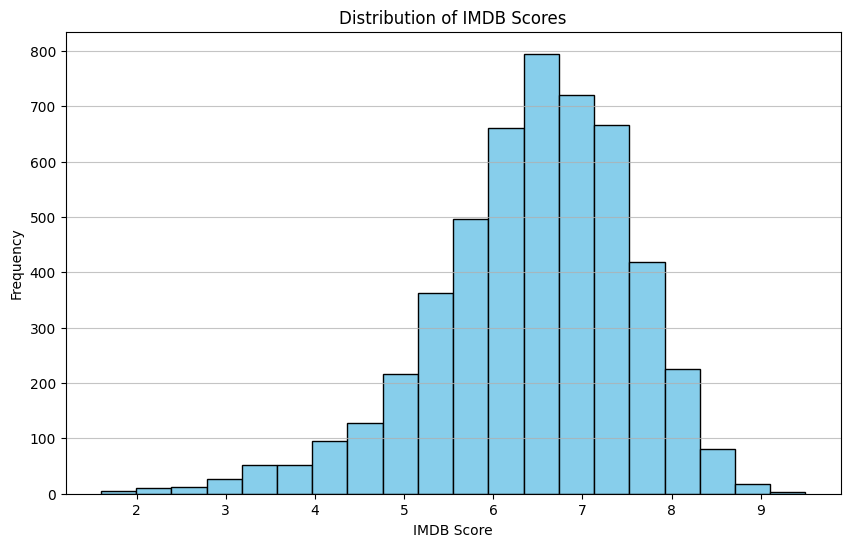

In [ ]:
# Setting the figure size to 10x6 inches to ensure better visualization and readability of the histogram.
MTptLB.figure(figsize=(10, 6))

# Creating a histogram to visualizedistribution of IMDbscores, using 20 bins to group-similar-values-together.
MTptLB.hist(Predict_Movie_Success_DataSet['imdb_score'], bins=20, color='skyblue', edgecolor='black')

# Adding a title to the histogram to clearlyindicate that it represents the distribution of IMDbscores.
MTptLB.title('Distribution of IMDB Scores')

# Labeling the xaxis to specify that it represents IMDbscores.
MTptLB.xlabel('IMDB Score')

# Labeling the yaxis to indicate that it represents the frequency of movies within each IMDbscore range.
MTptLB.ylabel('Frequency')

# Adding a grid with slight transparency along the yaxis to enhancereadability and help interpret frequencyvalues.
MTptLB.grid(axis='y', alpha=0.75)

# Displaying the histogram to visualize the frequency distribution of IMDbscores in the dataset.
MTptLB.show()

In [ ]:
# Creating a piechart using PlotlyExpress to visualize the distribution of moviesuccesscategories ('HIT', 'AVG', 'FLOP').
figu = PoXe.pie(Predict_Movie_Success_DataSet, names='imdb_binned', title='Distribution of Movie Success')

# Displaying the piechart to analyze the proportion of moviesclassified under differentsuccesscategories.
figu.show()

In [ ]:
# Creating the feature matrix (X) by removing the target column ('imdb_binned') from the dataset,
# ensuring that only independent variables are used for model training.
X = Predict_Movie_Success_DataSet.drop('imdb_binned', axis=1)

# Defining the target variable (y) by selecting the 'imdb_binned' column,
# which contains the categorical labels ('HIT', 'AVG', 'FLOP') for movie success classification.
y = Predict_Movie_Success_DataSet['imdb_binned']

In [ ]:
y.value_counts()

,count
imdb_binned,
0,3297
2,887
1,859


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
y_onehotenc = to_categorical(y, num_classes=3)

In [ ]:
# Initializing an instance of StandardScaler, a preprocessing tool that standardizes numericalfeatures
# by removing the mean and scaling to unit variance, ensuring that all features contributeequally to the model.
scalData = StandardScaler()

# Applying the standardization process to the feature matrix (X) by fitting the scaler to the data
# and transforming it, which results in a new dataset (X_scaled) where each feature has a mean of 0 and a standard deviation of 1.
XScaledNorm = scalData.fit_transform(X)

In [ ]:
XTrainSetModelDL, XTestSetModelDL, YTrainSetModelDL, YTestSetModelDL = train_test_split(XScaledNorm, y_one_hot, test_size=0.2, random_state=42)

In [ ]:
# Initializing a Sequentialmodel, which allows for stackingmultiplelayers in a linear fashion.
ModelAnnMod = Sequential([
    # Adding a Dense layer with 64 neurons and ReLU activation, specifying the input shape as the number of features in XTrainSetModelDL.
    Dense(64, activation='relu', input_shape=(XTrainSetModelDL.shape[1],)),

    # Adding a Dropout layer with a rate of 0.3 to randomly deactivate 30% of neurons, preventing overfitting.
    Dropout(0.3),

    # Adding another Dense layer with 32 neurons and ReLU activation to learn more complex patterns in the data.
    Dense(32, activation='relu'),

    # Adding the final output Dense layer with 3 neurons (one per class) and a softmax activation function
    # to generate probability distributions for multi-class classification.
    Dense(3, activation='softmax')
])

# Defining the learning rate for the Adam optimizer, which controls the step size during gradient descent updates.
learning_rate = 0.1

# Initializing the Adam optimizer with the specified learning rate,
# which adapts learning rates per parameter for more efficient training.
optimizer = Adam(learning_rate=learning_rate)

# Compiling the model by specifying the optimizer, loss function, and evaluation metric.
# Using 'categorical_crossentropy' as the loss function for multi-class classification
# and 'accuracy' as the performance metric to track during training.
ModelAnnMod.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the neural network model using the training dataset for 5 epochs with a batch size of 32,
# validating performance using the test dataset, and displaying real-time progress with verbose=1.
HistoryANNMod = ModelAnnMod.fit(XTrainSetModelDL, YTrainSetModelDL, epochs=5, batch_size=32,
                                validation_data=(XTestSetModelDL, YTestSetModelDL), verbose=1)

Epoch 1/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6866 - loss: 0.8222 - val_accuracy: 0.7611 - val_loss: 0.7575
Epoch 2/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8470 - loss: 0.4230 - val_accuracy: 0.8940 - val_loss: 0.2834
Epoch 3/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8848 - loss: 0.3140 - val_accuracy: 0.8801 - val_loss: 0.3948
Epoch 4/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7819 - loss: 0.7055 - val_accuracy: 0.7324 - val_loss: 0.7803
Epoch 5/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7212 - loss: 0.7866 - val_accuracy: 0.7354 - val_loss: 0.8254


In [ ]:
# Using the trained neuralnetworkmodel (ModelAnnMod) to make predictions on the test dataset (XTestSetModelDL).
# The output (ypredANNprobMod) contains probability values for each class.
ypredANNprobMod = ModelAnnMod.predict(XTestSetModelDL)

# Converting predicted probability values into class labels by selecting the index of the highest probability
# in each prediction, effectively determining the most likely class.
y_predANNModel = NMpy.argmax(ypredANNprobMod, axis=1)

# Extracting the actual class labels from the one-hot encoded test labels (YTestSetModelDL)
# by selecting the index of the '1' in each row.
y_testclassesANNMod = NMpy.argmax(YTestSetModelDL, axis=1)

# Calculating the accuracy score, which measures the proportion of correctly predicted labels
# out of the total test samples.
AccuracyScoreModelANN = accuracy_score(y_testclassesANNMod, y_predANNModel)

# Computing the precision score using the 'macro' average,
# which calculates the precision for each class and averages them equally.
PrecisionScoreModelANN = precision_score(y_testclassesANNMod, y_predANNModel, average='macro')

# Computing the recall score using the 'macro' average,
# which calculates the recall for each class and averages them equally.
RecallScoreModelANN = recall_score(y_testclassesANNMod, y_predANNModel, average='macro')

# Computing the F1 score using the 'macro' average,
# which provides a balance between precision and recall for multi-class classification.
F1ScoreModelANN = f1_score(y_testclassesANNMod, y_predANNModel, average='macro')

# Printing the accuracy, precision, recall, and F1 scores to evaluate the model's performance.
print(f"AccuracyScore : {AccuracyScoreModelANN}")
print(f"PrecisionScore: {PrecisionScoreModelANN}")
print(f"RecallScore   : {RecallScoreModelANN}")
print(f"F1Score       : {F1ScoreModelANN}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
AccuracyScore : 0.7353815659068385
PrecisionScore: 0.756196547355084
RecallScore   : 0.4907528719004129
F1Score       : 0.5098653988717413


In [ ]:
print(classification_report(y_testclassesANNMod, y_predANNModel))

              precision    recall  f1-score   support

           0       0.72      0.97      0.83       671
           1       0.69      0.07      0.13       156
           2       0.86      0.43      0.57       182

    accuracy                           0.74      1009
   macro avg       0.76      0.49      0.51      1009
weighted avg       0.74      0.74      0.67      1009



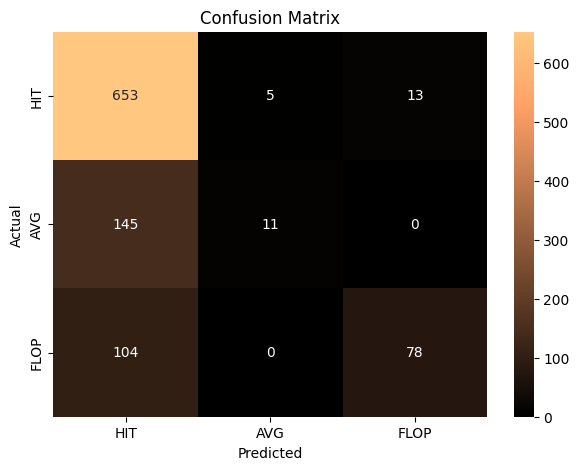

In [ ]:
# Compute the confusion matrix to evaluate the accuracy of the classification model
cofmatr = confusion_matrix(y_testclassesANNMod, y_predANNModel)

# Set the figure size for better visibility of the heatmap representation of the confusion matrix
MTptLB.figure(figsize=(7, 5))

# Generate a heatmap to visualize the confusion matrix with labeled values, formatted as integers, and using a copper color theme
SBrn.heatmap(cofmatr, annot=True, fmt='d', cmap='copper',
             xticklabels=['HIT', 'AVG', 'FLOP'], yticklabels=['HIT', 'AVG', 'FLOP'])

# Label the x-axis of the heatmap to indicate the predicted class categories assigned by the model
MTptLB.xlabel('Predicted')

# Label the y-axis of the heatmap to represent the actual class categories from the ground truth dataset
MTptLB.ylabel('Actual')

# Provide a descriptive title for the plot to clearly communicate that it represents the confusion matrix of the model
MTptLB.title('Confusion Matrix')

# Display the generated confusion matrix heatmap to visualize model performance in classification
MTptLB.show()